Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]


===================================BUG REPORT===================================
Welcome to bitsandbytes. For bug reports, please run

python -m bitsandbytes

 and submit this information together with your error trace to: https://github.com/TimDettmers/bitsandbytes/issues
bin /home/xdb/.conda/envs/diffusers/lib/python3.9/site-packages/bitsandbytes/libbitsandbytes_cuda118.so
CUDA SETUP: CUDA runtime path found: /usr/local/cuda-11.8/lib64/libcudart.so.11.0
CUDA SETUP: Highest compute capability among GPUs detected: 8.9
CUDA SETUP: Detected CUDA version 118
CUDA SETUP: Loading binary /home/xdb/.conda/envs/diffusers/lib/python3.9/site-packages/bitsandbytes/libbitsandbytes_cuda118.so...


/home/xdb/.conda/envs/diffusers/lib/python3.9/site-packages/bitsandbytes/cuda_setup/main.py:145: UserWarning: /home/xdb/.conda/envs/diffusers did not contain ['libcudart.so', 'libcudart.so.11.0', 'libcudart.so.12.0'] as expected! Searching further paths...
  warn(msg)


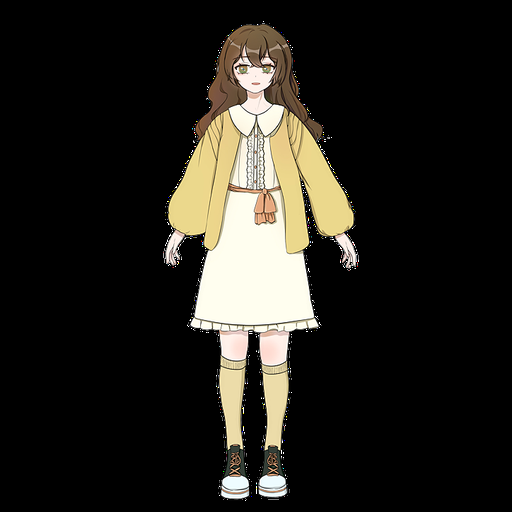

In [1]:
import torch
from diffusers import StableDiffusionPipeline, DDIMScheduler
from diffusers.utils import load_image

pipeline = StableDiffusionPipeline.from_pretrained(
    "runwayml/stable-diffusion-v1-5",
    torch_dtype=torch.float16,
).to("cuda")
pipeline.scheduler = DDIMScheduler.from_config(pipeline.scheduler.config)
pipeline.load_ip_adapter("h94/IP-Adapter", subfolder="models", weight_name="ip-adapter-full-face_sd15.bin")



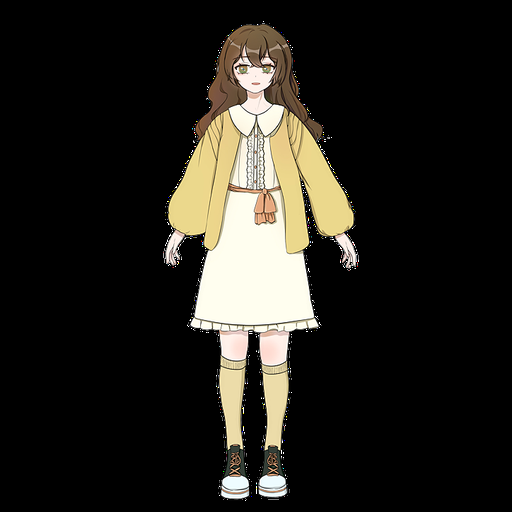

In [11]:
image = load_image("./data/character/s15_girl_character/s6_behind_rgba_rmbg_2.png")
image


  0%|          | 0/100 [00:00<?, ?it/s]

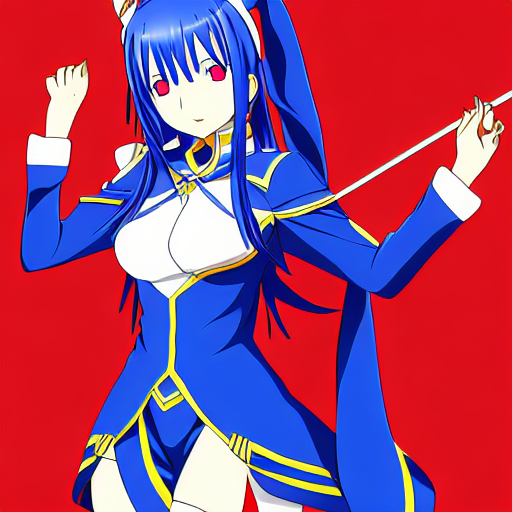

In [21]:
pipeline.set_ip_adapter_scale(0.5)

generator = torch.Generator(device="cpu").manual_seed(26)

image = pipeline(
    # prompt="A photo of Einstein as a chef, wearing an apron, cooking in a French restaurant",
    prompt = "a female anime character",
    ip_adapter_image=image,
    negative_prompt="lowres, bad anatomy, worst quality, low quality",
    num_inference_steps=100,
    generator=generator,
).images[0]
image